# 量子卷積神經網絡（QCNN）教學

## 介紹
量子卷積神經網絡（Quantum Convolutional Neural Network, QCNN）是一種結合量子計算和卷積神經網絡的混合模型。這種模型利用量子計算的特性來提升神經網絡的性能。

## 目標
在本教學中，我們將介紹如何使用 Python 和 PennyLane 庫來構建一個簡單的 QCNN。

## 步驟
### 步驟 1：安裝所需庫
我們需要安裝 PennyLane 和其他一些依賴庫。

In [1]:
!pip install pennylane pennylane-qiskit matplotlib

                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB 435.7 kB/s eta 0:00:05
     --                                       0.1/1.8 MB 751.6 kB/s eta 0:00:03
     -----                                    0.2/1.8 MB 1.4 MB/s eta 0:00:02
     ----------                               0.5/1.8 MB 2.3 MB/s eta 0:00:01
     ---------------------                    0.9/1.8 MB 3.7 MB/s eta 0:00:01
     ---------------------------------------  1.8/1.8 MB 5.9 MB/s eta 0:00:01
     ---------------------------------------- 1.8/1.8 MB 5.7 MB/s eta 0:00:00
                                              0.0/49.3 kB ? eta -:--:--
     ---------------------------------------- 49.3/49.3 kB ? eta 0:00:00
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
                                       

### 步驟 2：導入所需模組

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

### 步驟 3：定義量子卷積層
量子卷積層由一組量子門操作組成，用於對輸入量子態進行卷積操作。

In [3]:
def quantum_conv_layer(qubits, params):
    n_qubits = len(qubits)
    for i in range(n_qubits):
        qml.Rot(*params[i], wires=qubits[i])
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[qubits[i], qubits[i + 1]])

### 步驟 4：定義量子池化層
量子池化層用於減少量子態的維度。

In [4]:
def quantum_pooling_layer(qubits):
    for i in range(0, len(qubits), 2):
        qml.CNOT(wires=[qubits[i], qubits[i + 1]])
        qml.RY(-np.pi / 2, wires=qubits[i + 1])
        qml.CNOT(wires=[qubits[i], qubits[i + 1]])
        qml.RY(np.pi / 2, wires=qubits[i + 1])
        qml.PauliX(wires=qubits[i + 1])

### 步驟 5：定義QCNN模型

In [5]:
n_qubits = 4  # 使用4個量子比特
dev = qml.device('default.qubit', wires=n_qubits)

@qml.qnode(dev)
def QCNN_circuit(params):
    quantum_conv_layer(range(n_qubits), params[0])
    quantum_pooling_layer(range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

### 步驟 6：訓練QCNN
我們將使用簡單的隨機梯度下降法來訓練QCNN。

In [6]:
def cost(params):
    return np.sum(QCNN_circuit(params))

params = np.random.randn(2, n_qubits, 3)
opt = qml.GradientDescentOptimizer(stepsize=0.4)
steps = 100
for i in range(steps):
    params = opt.step(cost, params)
    if (i + 1) % 10 == 0:
        print(f"Step {i+1}, Cost: {cost(params)}")

Step 10, Cost: -1.9901008816036772
Step 20, Cost: -1.9999351382894393
Step 30, Cost: -1.999999556820339
Step 40, Cost: -1.999999996971019
Step 50, Cost: -1.9999999999792988
Step 60, Cost: -1.9999999999998597
Step 70, Cost: -2.000000000000001
Step 80, Cost: -2.000000000000001
Step 90, Cost: -2.0000000000000018
Step 100, Cost: -2.0000000000000018


### 步驟 7：可視化結果

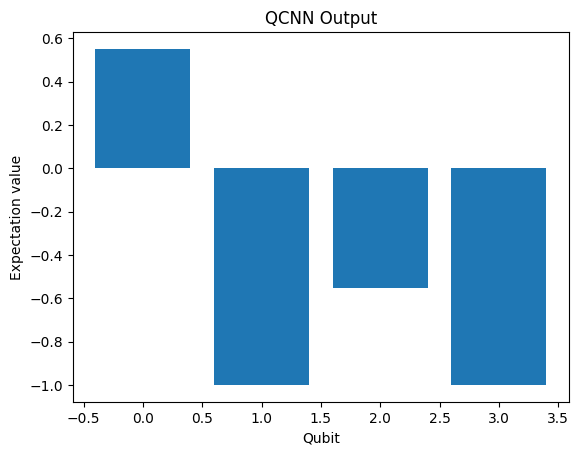

In [7]:
results = QCNN_circuit(params)
plt.bar(range(n_qubits), results)
plt.xlabel('Qubit')
plt.ylabel('Expectation value')
plt.title('QCNN Output')
plt.show()